# Tutorial to zeolite graph isomorphism

This tutorial illustrates the existence of isomorphism between zeolite structures.

This implementation was made by Daniel Schwalbe-Koda. It is compatible with the `pymatgen` and `networkx` packages. If you use this code or tutorial, please cite 

D. Schwalbe-Koda, Z. Jensen, E. Olivetti, and R. Gómez-Bombarelli. "Graph similarity drives zeolite diffusionless transformations and intergrowth." _Nature Materials_ (2019). Link: https://www.nature.com/articles/s41563-019-0486-1

## Imports

In [1]:
import sys
sys.path.append('../zeograph')

In [2]:
import networkx as nx
from structure import Zeolite

import matplotlib.pyplot as plt
%matplotlib inline

## Example: GME-AFI transformation

The following example is extracted from our main article. We compare the crystal structures of AFI and GME zeolite by using a periodic graph representation. We first create such graphs from the crystallographic file retrieved from the [International Zeolite Association](http://www.iza-structure.org/databases/) database:

In [3]:
AFI = Zeolite.from_file('../data/cif/AFI.cif')
GME = Zeolite.from_file('../data/cif/GME.cif')
CHA = Zeolite.from_file('../data/cif/CHA.cif')

/home/dskoda/packages/conda/envs/zeograph/lib/python3.7/site-packages/pymatgen/io/cif.py:1107: UserWarning: Issues encountered while parsing CIF:
  warnings.warn("Issues encountered while parsing CIF:")
/home/dskoda/packages/conda/envs/zeograph/lib/python3.7/site-packages/pymatgen/io/cif.py:1109: UserWarning: Some fractional co-ordinates rounded to ideal values to avoid finite precision errors.
  warnings.warn(error)


Visual inspection of the graphs of the systems:

/home/dskoda/packages/conda/envs/zeograph/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


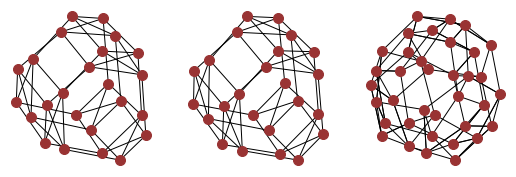

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

nx_draw_params = {
    'node_color': '#993333',
    'node_size': 100
}

nx.draw_kamada_kawai(AFI.get_periodic_graph(), ax=ax[0], **nx_draw_params)
nx.draw_kamada_kawai(GME.get_periodic_graph(), ax=ax[1], **nx_draw_params)
nx.draw_kamada_kawai(CHA.get_periodic_graph(), ax=ax[2], **nx_draw_params)

Now, we just have to calculate the existence of an isomorphism between them:

In [5]:
print(nx.is_isomorphic(AFI.get_periodic_graph(), GME.get_periodic_graph()))

True


If we inspect the existence of isomorphism between CHA and the other two zeolites, we will find that both do not share the same graph representation:

In [6]:
print(nx.is_isomorphic(CHA.get_periodic_graph(), GME.get_periodic_graph()))
print(nx.is_isomorphic(CHA.get_periodic_graph(), AFI.get_periodic_graph()))

False
False
